In [1]:
import h3pandas
import geopandas as gpd
import pandas as pd

In [2]:
birds = pd.read_csv("../data/PFW_all_2021_2023_June2023_Public/PFW_all_2021_2023_June2023_Public.csv")

In [3]:
birds_gdf = gpd.GeoDataFrame(
    birds, geometry=gpd.points_from_xy(birds.LONGITUDE, birds.LATITUDE), crs="EPSG:4326"
)

In [4]:
states = gpd.read_file("../../ideas/Esri/USA_States_Generalized.geojson")

In [5]:
conn = states[states["STATE_NAME"] == "Connecticut"]

In [6]:
crows_all = birds_gdf[birds_gdf["SPECIES_CODE"] == "amecro"]

In [7]:
conn_crows = gpd.clip(crows_all, conn)

<Axes: >

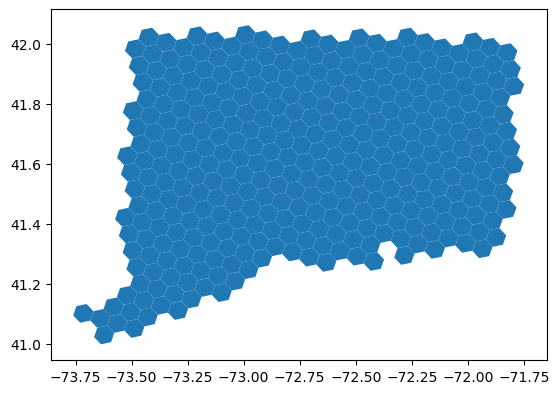

In [8]:
resolution = 6
hexagons = conn.h3.polyfill_resample(resolution)
hexagons.plot()

In [9]:
hexagons["count"] = 0
for i in range(conn_crows.shape[0]):
    conn_crows_ = conn_crows["geometry"].values[i]
    update_bools = hexagons.intersects(conn_crows_)
    hexagons.loc[update_bools, "count"] = hexagons.loc[update_bools, "count"] + 1

In [10]:
hexagons = hexagons[hexagons["count"] != 0]

In [11]:
m = conn.explore(tiles="CartoDB dark_matter", color="orange", style_kwds={"fill":False})
hexagons.explore(m=m, tiles="CartoDB dark_matter", scheme = "fisherjenks", tooltip=["count"], column="count", cmap="cool", style_kwds={"stroke":False, "fillOpacity":0.8}, legend_kwds={"colorbar":True})

C:\Users\chris\miniconda3\envs\mapchalenv\Lib\site-packages\geopandas\explore.py:465: UserWarning: Numba not installed. Using slow pure python version.
  binning = classify(


In [12]:
hexagons.to_file("../data/conn_hex_crows.geojson")

In [13]:
conn.to_file("../data/connecticut_boundary.geojson")

In [14]:
m.save("../outputs/conn_crows.html")